In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import datetime as dt

tsa_file = "tsa_data_24Jan.csv"
tsa_df = pd.read_csv(tsa_file)
tsa_df.head()

,date,2021,2020,2019
0,1-Jan,805990.0,2311732.0,2126398.0
1,2-Jan,1192881.0,2178656.0,2345103.0
2,3-Jan,1327289.0,2422272.0,2202111.0
3,4-Jan,1080346.0,2210542.0,2150571.0
4,5-Jan,766594.0,1806480.0,1975947.0


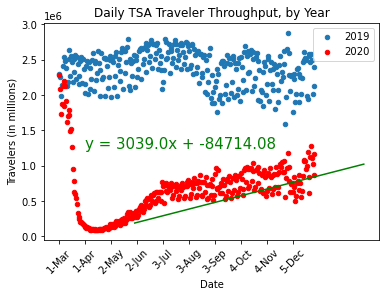

R-value: 0.8498427425465905


In [21]:
start_index = tsa_df[tsa_df['date'].str.contains("1-Mar")==True].index[0]
end_index = tsa_df[tsa_df['date'].str.contains("31-Dec")==True].index[0]

mar_dec = tsa_df[start_index:end_index+1]

ax1 = mar_dec.plot(kind="scatter",x='date',y='2019',label='2019')
mar_dec.plot(kind="scatter",x='date',y='2020',label='2020',color='Red',ax=ax1)

plt.xticks(np.arange(0,len(mar_dec['date']), 31),rotation=45)
plt.ylabel("Travelers (in millions)")
plt.xlabel("Date")
plt.title("Daily TSA Traveler Throughput, by Year")

# find regression line after 01Apr2020 and r-value
start_index = tsa_df[tsa_df['date'].str.contains("1-Apr")==True].index[0]
end_index = tsa_df[tsa_df['date'].str.contains("31-Dec")==True].index[0]

apr_dec = tsa_df[start_index:end_index+1]

# x_values = days since 01Jan2020
x_values = apr_dec.index.values
y_values = apr_dec['2020']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(30,1.25e6),fontsize=15,color="green")
plt.show()

print(f"R-value: {rvalue}")

In [22]:
# Average daily # of TSA travelers, by year:
tsa_df.dropna(thresh=2).mean().astype(int)

2021     787036
2020     758200
2019    2341480
dtype: int64

In [30]:
# According to line_eq:
# when travel is "normal", TSA throughput will return to 2019 average:
y = 2341480
x = (y + 84714.08)/3039
start = dt.datetime(2020, 1, 1)
(start + dt.timedelta(days=x)).strftime('%y-%m-%d')

'22-03-09'

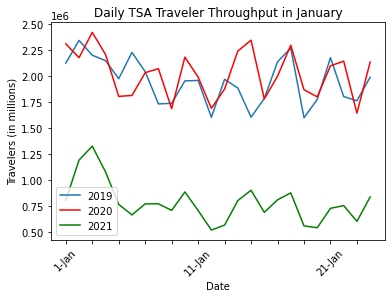

In [31]:
jan = tsa_df.dropna(how='any')

ax2 = jan.plot(kind="line",x='date',y='2019',label='2019')
jan.plot(kind="line",x='date',y='2020',label='2020',color='Red',ax=ax2)
jan.plot(kind="line",x='date',y='2021',label='2021',color='green',ax=ax2)

plt.xticks(np.arange(0,len(jan['date']), 2),rotation=45)
plt.ylabel("Travelers (in millions)")
plt.xlabel("Date")
plt.title("Daily TSA Traveler Throughput in January")
plt.show()

In [32]:
# Average # of daily TSA travelers in January 2021, 1st through 24th:
jan.mean().astype(int)

2021     787036
2020    2027230
2019    1951755
dtype: int64